### EXERCISE 1

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('mtcars.csv')
df.head(10)

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [3]:
df.isnull().sum()

model    0
mpg      0
cyl      0
disp     0
hp       0
drat     0
wt       0
qsec     0
vs       0
am       0
gear     0
carb     0
dtype: int64

In [4]:
# from this we can conculde that there are no missing values in the dataset

##### Q1

In [5]:
#defining the function
def myFnLinReg(x,y):
    beta = (((y-y.mean())*(x-x.mean())).sum())/(((x-x.mean())*(x-x.mean())).sum())
    alpha = y.mean()-(beta*x.mean())
    return beta,alpha

##### Q2

In [6]:
training_data = df.sample(frac=0.8,random_state =25)
testing_data = df.drop(training_data.index)

In [7]:
x_training = training_data['wt']
y_training = training_data['mpg']
beta,alpha=myFnLinReg(x_training,y_training)
print("beta ="+ str(beta)+" alpha ="+ str(alpha))

beta =-5.323330840988155 alpha =37.539926969102396


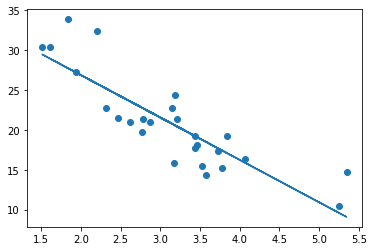

In [8]:
#linear regression graph for reference
from matplotlib import pyplot as plt
plt.scatter(x_training,y_training)
plt.plot(x_training,beta*x_training+alpha)

##### Q3

In [9]:
input_wt = float(input("Enter wt of the car: "))
def mpg_calculator(input_wt):
    req_mpg = alpha + beta*input_wt
    return req_mpg
mpg_calculator(input_wt)

Enter wt of the car: 5.5


8.261607343667542

##### Q4

In [10]:
def RMSE_calculator(y_test,y_pred):
    diff_sq = []
    size = y_test.size
    for i in range(size):
        diff_sq.append((y_pred[i]-y_test[i]),2)
    return pow((np.sum(diff_sq)/size),0.5)

In [11]:
def R_Square_Calculator(y_test,y_pred):
    size = np.size(y_test)
    sum_x = np.sum(y_test)
    sum_y = np.sum(y_pred)
    sum_x2 = np.sum(np.square(y_test))
    sum_y2 = np.sum(np.square(y_pred))
    sum_xy = np.sum(np.multiply(y_test,y_pred))

    R2 = ((size*sum_xy)-(sum_x*sum_y))/pow((((size*sum_x2)-(sum_x*sum_x))*((size*sum_y2)-(sum_y*sum_y))),0.5)
    return R2

In [12]:
x_test = testing_data['wt'].to_numpy()
y_test = testing_data['mpg'].to_numpy()
y_pred = []

for i in range(x_test.size):
    y_pred.append(mpg_calculator(x_test[i]))

RMSE_calculator(y_test, y_pred)

TypeError: append() takes exactly one argument (2 given)

In [13]:
R_Square_Calculator(y_pred,y_test)

0.9055812403263088

##### Q5

In [14]:
X=np.array(df['wt'].values,'float')
y=np.array(df['mpg'].values,'float')

In [15]:
#we now use the hstack function from numpy as it adds a column of 1's this is done to get a constant b in a linear regression eqn y = mx + c
X=X.reshape(X.shape[0],1)
X = np.hstack([np.ones_like(X),X])
y=y.reshape(y.shape[0],1)
m = y.shape[0]

In [16]:
X

array([[1.   , 2.62 ],
       [1.   , 2.875],
       [1.   , 2.32 ],
       [1.   , 3.215],
       [1.   , 3.44 ],
       [1.   , 3.46 ],
       [1.   , 3.57 ],
       [1.   , 3.19 ],
       [1.   , 3.15 ],
       [1.   , 3.44 ],
       [1.   , 3.44 ],
       [1.   , 4.07 ],
       [1.   , 3.73 ],
       [1.   , 3.78 ],
       [1.   , 5.25 ],
       [1.   , 5.424],
       [1.   , 5.345],
       [1.   , 2.2  ],
       [1.   , 1.615],
       [1.   , 1.835],
       [1.   , 2.465],
       [1.   , 3.52 ],
       [1.   , 3.435],
       [1.   , 3.84 ],
       [1.   , 3.845],
       [1.   , 1.935],
       [1.   , 2.14 ],
       [1.   , 1.513],
       [1.   , 3.17 ],
       [1.   , 2.77 ],
       [1.   , 3.57 ],
       [1.   , 2.78 ]])

In [17]:
theta = np.zeros((2,1))#to give an array of simension 2,1 filled with zeros
theta

array([[0.],
       [0.]])

##### Stochastic gradient descent

In [24]:
import random
def stoch_gd(x,y,epochs, learning_rate = 0.001):
    total_samples = x.shape[0]
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):    
        random_index = random.randint(0,total_samples-1) # random index from total samples
        sample_x = x[random_index]
        sample_y = y[random_index]

        y_predicted = theta[0][0]*sample_x + theta[1][0]
        theta0_grad = -(2/total_samples)*(sample_x*(sample_y-y_predicted))
        theta1_grad = -(2/total_samples)*(sample_y-y_predicted)
        theta[0][0] = theta[0][0] - learning_rate * theta0_grad
        theta[1][0] = theta[1][0] - learning_rate * theta1_grad
        
        cost = (sample_y-y_predicted)**2
        if i%100==0: # at every 100th iteration record the cost and epoch value
            cost_list.append(cost)
            epoch_list.append(i)
        
    return theta, cost, cost_list, epoch_list

theta, cost_sgd, cost_list_sgd, epoch_list_sgd = stoch_gd(x_training,y_training,20000)
theta, cost_sgd

KeyError: 4

##### Mini Batch Gradient Descent

In [25]:
# linear regression using "mini-batch" gradient descent

# function to compute gradient of error function w.r.t. theta
def gradient(X, y, theta):
    h = np.dot(X, theta) #Hypothesis
    grad = np.dot(X.T, (h - y))
    return grad

def cost(X, y, theta):
    h = np.dot(X, theta)
    J = (1/2)*np.dot((h - y).transpose(), (h - y))
    return J[0]
  
# function to create a list containing mini-batches
def create_mini_batches(X, y, batch_size):
    mini_batches = []
    data = np.hstack((X, y))
    np.random.shuffle(data)
    n_minibatches = data.shape[0] // batch_size
    i = 0
  
    for i in range(n_minibatches + 1):
        mini_batch = data[i * batch_size:(i + 1)*batch_size, :]
        X_mini = mini_batch[:, :-1]
        Y_mini = mini_batch[:, -1].reshape((-1, 1))
        mini_batches.append((X_mini, Y_mini))
    if data.shape[0] % batch_size != 0:
        mini_batch = data[i * batch_size:data.shape[0]]
        X_mini = mini_batch[:, :-1]
        Y_mini = mini_batch[:, -1].reshape((-1, 1))
        mini_batches.append((X_mini, Y_mini))
    return mini_batches

# function to perform mini-batch gradient descent
def gradientDescent_Mini(X, y, learning_rate = 0.001, batch_size = 8):
    cost_list=[]
    theta = np.zeros((2, 1))
    epoch_list=[]
    max_iters = 10
    for itr in range(max_iters):
        mini_batches = create_mini_batches(X, y, batch_size)
        for mini_batch in mini_batches:
            X_mini, y_mini = mini_batch
            theta = theta - learning_rate * gradient(X_mini, y_mini, theta)
            cost_list.append(cost(X_mini, y_mini, theta))
  
    return theta, cost_list

### EXERCISE 2

In [18]:
dfb = pd.read_csv("Boston.csv")
dfb.head(10)

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,6,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,9,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,10,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [19]:
dfbn = dfb.drop("Unnamed: 0",axis=1)

##### Q1

In [20]:
correlation_medv = dfbn.corr()
medv_relationship = pd.DataFrame(correlation_medv.sort_values('medv',ascending = False))
print(medv_relationship[:]['medv'])

medv       1.000000
rm         0.695360
zn         0.360445
black      0.333461
dis        0.249929
chas       0.175260
age       -0.376955
rad       -0.381626
crim      -0.388305
nox       -0.427321
tax       -0.468536
indus     -0.483725
ptratio   -0.507787
lstat     -0.737663
Name: medv, dtype: float64


the top 5 features to predict 'MEDV' will be as follows
- lstat
- rm
- ptratio
- indus
- tax

##### Q2

In [21]:
from sklearn import linear_model
X = dfb[['lstat','rm','ptratio']]
y = dfb['medv']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
lstat,-0.575521
rm,4.264947
ptratio,-1.136547


the req ratio is as follows 
##### medv =  -0.575521*lstat + 4.264947*rm - 1.136547*ptratio

##### Q3

In [22]:
regressor.score(X_test,y_test)

0.4881642015692508